In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import datetime, os
from pathlib import Path
import cv2

In [46]:
# Capture frames from the video for training and testing purpose
# From this tutorial:
# https://www.tutorialexample.com/python-capture-images-from-video-by-frames-using-opencv-a-complete-guide/

VIDEO_PATH = Path('video/original.mp4')
FRAME_FOLDER_PATH = Path('data/video_frames')

def capture_frames(
    num_captures: int = 10,
    frame_frequency: int = 100,
    video_path=VIDEO_PATH,
    frame_folder_path=FRAME_FOLDER_PATH,
):
    """Capture frames from the given video at a given frame frequency.

    Captured frames will be stored in the folder specified by `frame_folder_path`. Each image
    is labeled as {index}.png

    :param frame_frequency: The frequency at which frames are captured as image.
    :param video_path: A Path object to the video.
    :param frame_folder_path: A Path object to the folder where the captured frames will be stored.
    """
    cap = cv2.VideoCapture(str(video_path))
    if not cap.isOpened():
        exit(0)
    total_frame = 0
    idx = 0
    while idx < num_captures:
        ret, frame = cap.read()
        if ret is False:
            break
        total_frame += 1
        if total_frame % frame_frequency == 0:
            image_path = frame_folder_path.joinpath(f'{idx:02}.png')
            cv2.imwrite(str(image_path), frame)
            print(image_path)
            idx += 1
    cap.release()


def show_images(images, number_of_images, cmap=None):
    """Show images in a column.

    :param images: A numpy array of images. Each image must be converted to an array already.
    :param number_of_images: number of images to show. All images will be shown in a column.
    :param cmap: Color map. If the image is grey scale, pass 'grey', otherwise leave as None.
    """
    fig, axes = plt.subplots(number_of_images, 1, figsize=(10, number_of_images * 5))
    for image, ax in zip(images, axes.flatten()):
        ax.imshow(image, cmap=cmap)
        ax.set_axis_off()
    plt.tight_layout()
    plt.show()

In [47]:
capture_frames()

data/video_frames/00.png
data/video_frames/01.png
data/video_frames/02.png
data/video_frames/03.png
data/video_frames/04.png
data/video_frames/05.png
data/video_frames/06.png
data/video_frames/07.png
data/video_frames/08.png
data/video_frames/09.png


In [50]:
# Grab all images
all_image_paths = list(FRAME_FOLDER_PATH.glob('*.png'))
# Images in PIL format. This format can be used in show_images
images_pil = [keras.preprocessing.image.load_img(str(p)) for p in all_image_paths]

# Images in np array format. This format cannot be used to directly display the image
# to display image from images, each image has to under go an additional transformation
# `.astype('uint8')`
# Each element in the images array
images = np.array([(keras.preprocessing.image.img_to_array(img), i) for i, img in enumerate(images_pil)])
np.random.shuffle(images)

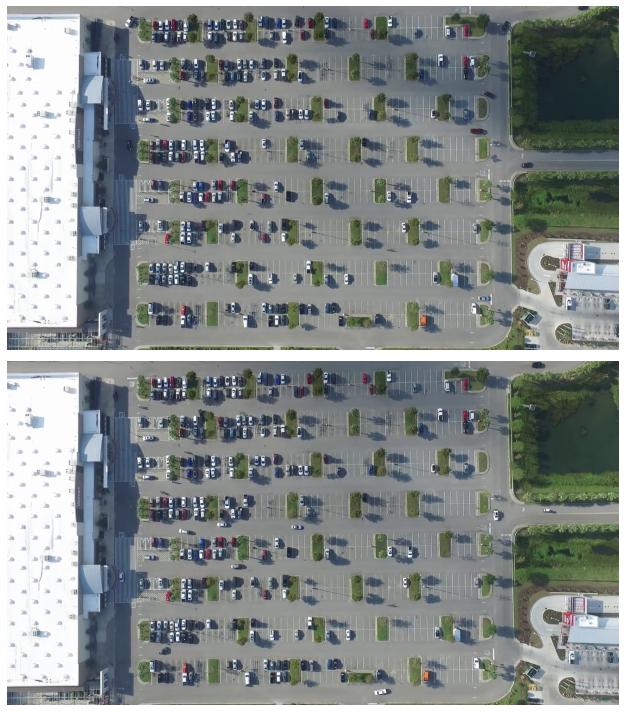

In [49]:
# Show original images
NUM_IMAGE = 2
show_images([img.astype('uint8') for img in images[:NUM_IMAGE]], NUM_IMAGE)